# **Data Analysis on factors affecting HDB prices**

## 1. Introduction

### Business Problem:
- The objective of this analysis is to identify the key factors that influence the resale prices of HDB flats in Singapore. By understanding these factors, stakeholders can make informed decisions about pricing, policy-making, and investments.


### Stakeholders & Why It Matters:
- **Real Estate Agents**: Need precise pricing strategies to maximize sale outcomes and advise clients effectively.
- **Homebuyers & Sellers**: Require clarity on what drives property prices to make informed buying or selling decisions.
- **Government & Policy Makers**: Understanding these factors is crucial for housing policy decisions, especially related to lease terms and housing affordability.


## 2. Data Loading

Import dependencies and libraries

In [117]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read files

In [118]:
file_path_1999 = 'datasets/hdb_resale_1990_1999.csv'
file_path_2012 = 'datasets/hdb_resale_2000_2012.csv'
file_path_2014 = 'datasets/hdb_resale_2012_2014.csv'
file_path_2016 = 'datasets/hdb_resale_2015_2016.csv'
file_path_2017 = 'datasets/hdb_resale_2017onwards.csv'
file_path_cpi = 'datasets/housing_cpi.csv'
df1 = pd.read_csv(file_path_1999)
df2 = pd.read_csv(file_path_2012)
df3 = pd.read_csv(file_path_2014)
df4 = pd.read_csv(file_path_2016)
df5 = pd.read_csv(file_path_2017)

cpi = pd.read_csv(file_path_cpi)

Inspect headers

In [119]:
df1.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000


In [120]:
df2.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0


In [121]:
df3.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0


In [122]:
df4.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0


In [123]:
df5.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0


Merging of dataframes

In [124]:
prices = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [125]:
prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [126]:
prices.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

Conversion of data types and renaming of headers

In [127]:
prices['month'] = pd.to_datetime(prices['month']) # to datetime
prices['lease_commence_date'] = pd.to_datetime(prices['lease_commence_date'].astype(str), format='%Y')
prices = prices.rename(columns={'month':'transaction_date'}) # rename header

In [128]:
prices.tail(1)

,transaction_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
929454,2024-07-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985-01-01,770000.0,60 years 03 months


In [129]:
prices.dtypes

transaction_date       datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date    datetime64[ns]
resale_price                  float64
remaining_lease                object
dtype: object

## 3. Data Cleaning

In [130]:
prices['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [131]:
prices['flat_type'].unique()
prices['flat_type'] = prices['flat_type'].replace({'MULTI-GENERATION': 'MULTI GENERATION'})

In [132]:
prices['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [133]:
prices['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

### Types of HDB Flat Models:

- **Standard**: Early HDB flats (1-5 rooms) from the 1960s, featuring combined WC and shower. 5-room units introduced in 1974.
- **Improved**: Launched in 1966, with separate WC and shower, void decks, and 5-room options starting in 1974.
- **New Generation**: Introduced in 1975; 3- and 4-room flats with en-suite master bedroom and improved amenities.
- **Model A**: From 1981, offering larger 3-, 4-, and 5-room flats, including 5-room maisonettes.
- **Model A2**: A smaller variant of Model A, such as the 4-room Model A2 (90 sqm).
- **Simplified**: Launched in 1984; compact 3- and 4-room units (64-84 sqm).
- **Multi Generation**: 3Gen flats designed for multi-generational families.
- **Maisonette**: Also known as Model A Maisonette, these are two-story HDB flats.
- **Premium Apartment**: 1990s flats with higher-quality finishes, ready-to-move-in condition.
- **Executive Maisonette**: Premium version of the Model A Maisonette; replaced by the Executive Condominium scheme after 1995.
- **Executive Apartment**: Introduced in 1983, replacing 5-room Model A flats, includes a utility/maid room.
- **DBSS**: High-priced, premium HDB flats built by private developers from 2005 to 2012 under the Design, Build and Sell Scheme.
- **Adjoined Flat**: Large units created by combining two HDB flats.
- **Terrace**: Early terrace flats built before land constraints were realized; no longer in production.
- **Type S1/S2**: Special apartments at The Pinnacle@Duxton, classified as 4- and 5-room flats, with significant historical and design value.
- **2-room**: Typically refers to 2-room Flexi flats with 1 bedroom and 1 common area.

Rename flat model duplicates naming to ensure data consistency

In [134]:
# Rename flat model duplicates
replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 
                  'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 
                  'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 
                  'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 
                  'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 
                  'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}

prices = prices.replace({'flat_model': replace_values})

prices['flat_model'].value_counts()

flat_model
Model A                 266039
Improved                242377
New Generation          189262
Simplified               57625
Premium Apartment        47139
Standard                 42597
Apartment                35568
Maisonette               31811
Model A2                 10165
DBSS                      3334
Adjoined flat             1254
Terrace                    694
Type S1S2                  656
Multi Generation           544
Executive Maisonette       212
2-room                     145
3Gen                        33
Name: count, dtype: int64

#### Handling missing values

##### Imputating the values of `remaining_lease`

In [135]:
prices.isnull().sum()

transaction_date            0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [136]:
# Function to convert 'remaining_lease' to numerical format
def convert_lease_to_years(lease_str):
    if isinstance(lease_str, str):  # Check if the value is a string
        match = re.match(r"(\d+) years(?: (\d+) months?)?", lease_str)
        if match:
            years = int(match.group(1))
            months = int(match.group(2)) if match.group(2) else 0
            return years + months / 12
    return lease_str  # Return the value as is if it's not a string

# Apply the function to the 'remaining_lease' column
prices['remaining_lease'] = prices['remaining_lease'].apply(convert_lease_to_years)

# Display the modified DataFrame
print(prices)

       transaction_date        town  flat_type block       street_name  \
0            1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
1            1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
2            1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
3            1990-01-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1   
4            1990-01-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1   
...                 ...         ...        ...   ...               ...   
929450       2024-07-01      YISHUN     5 ROOM  674B      YISHUN AVE 4   
929451       2024-07-01      YISHUN     5 ROOM  342A    YISHUN RING RD   
929452       2024-07-01      YISHUN     5 ROOM   297      YISHUN ST 20   
929453       2024-07-01      YISHUN  EXECUTIVE   406      YISHUN AVE 6   
929454       2024-07-01      YISHUN  EXECUTIVE   277      YISHUN ST 22   

       storey_range  floor_area_sqm         flat_model lease_commence_date  \
0          10 TO 12            31

In [137]:
# Calculate elapsed years
prices['elapsed_years'] = (prices['transaction_date'].dt.year - prices['lease_commence_date'].dt.year) + \
                          (prices['transaction_date'].dt.month - prices['lease_commence_date'].dt.month) / 12

# Calculate remaining lease where NaN
prices.loc[prices['remaining_lease'].isnull(), 'remaining_lease'] = 99 - prices['elapsed_years']

# Drop the temporary columns
prices.drop(columns=['elapsed_years'], inplace=True)

# Display the modified DataFrame
prices.head()

,transaction_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,9000.0,86.0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977-01-01,6000.0,86.0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,8000.0,86.0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977-01-01,6000.0,86.0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976-01-01,47200.0,85.0


In [138]:
prices.isna().sum()

transaction_date       0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [139]:
prices['remaining_lease'] = pd.to_numeric(prices['remaining_lease'])


### Handling outliers

#### Floor Area

In [140]:
summary_stats = prices['floor_area_sqm'].describe()
print(summary_stats)

count    929455.000000
mean         95.690280
std          25.821513
min          28.000000
25%          73.000000
50%          93.000000
75%         113.000000
max         307.000000
Name: floor_area_sqm, dtype: float64


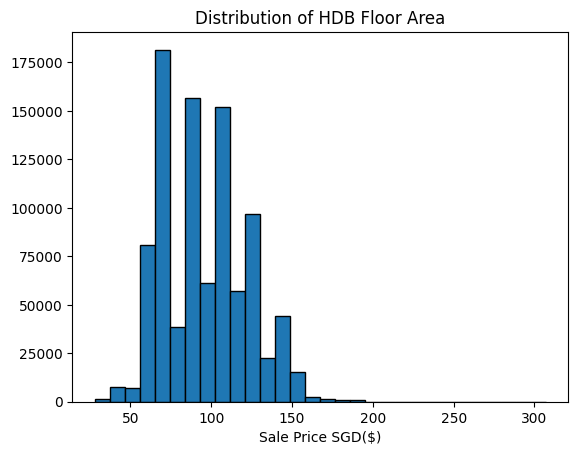

In [141]:
plt.hist(prices['floor_area_sqm'], bins=30, edgecolor='black')
plt.title('Distribution of HDB Floor Area')
plt.xlabel("Sale Price SGD($)")
plt.show()

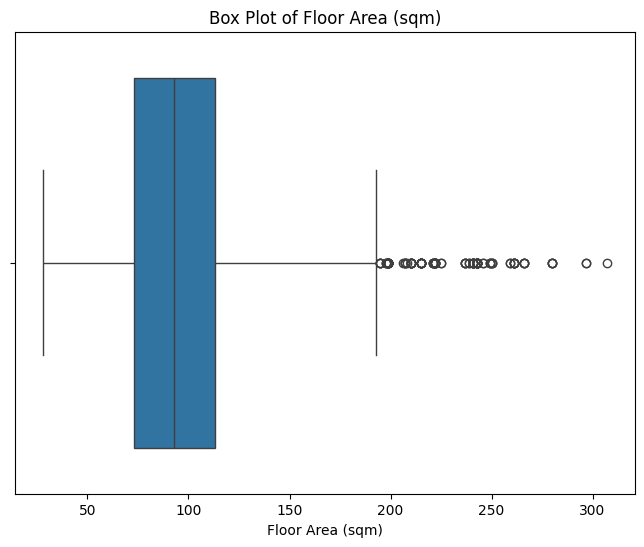

In [142]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=prices['floor_area_sqm'], whis=2)
plt.title('Box Plot of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.show()

In [143]:
# Calculate outliers based on box plot whiskers
Q1 = prices['floor_area_sqm'].quantile(0.25)
Q3 = prices['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1
print("Q3: ", Q3," IQR: ", IQR)
# Calculate upper bound for outliers
upper_bound = Q3 + 2 * IQR 
print("Upper bound: ", upper_bound)
print("\f")
# Filter rows where floor_area_sqm exceeds the upper bound (outliers)
outliers = prices[prices['floor_area_sqm'] > upper_bound]

# Count the occurrences of each flat_type among the outliers
flat_model_counts = outliers['flat_model'].value_counts()

print("Flat Type Counts among Outliers:")
print(flat_model_counts)

Q3:  113.0  IQR:  40.0
Upper bound:  193.0

Flat Type Counts among Outliers:
flat_model
Terrace                 75
Maisonette              31
Executive Maisonette     7
Apartment                5
Adjoined flat            1
Name: count, dtype: int64


The outliers identified in floor area mostly belong to special HDBs, which are larger than standard ones. Therefore, they might not be considered outliers.

#### Remaining Lease

In [144]:
prices['remaining_lease'].describe()


count    929455.000000
mean         80.721795
std          10.685123
min          41.500000
25%          73.833333
50%          82.500000
75%          89.500000
max         100.666667
Name: remaining_lease, dtype: float64

Upon checking, the abnormal remaining lease flat sales are due to the property sales occurred before the flats are built completely. Therefore, the transaction dates are earlier than the lease commence dates.
As there are only 51 rows of such data, out of 700K rows of data. The removal of such data rows has insignificant impact to the overall data. 

In [145]:
# Get number of rows where remaining lease > 99
indices_to_drop = prices[prices['remaining_lease'] > 99].index

# Drop the rows 
prices.drop(index=indices_to_drop, inplace=True)

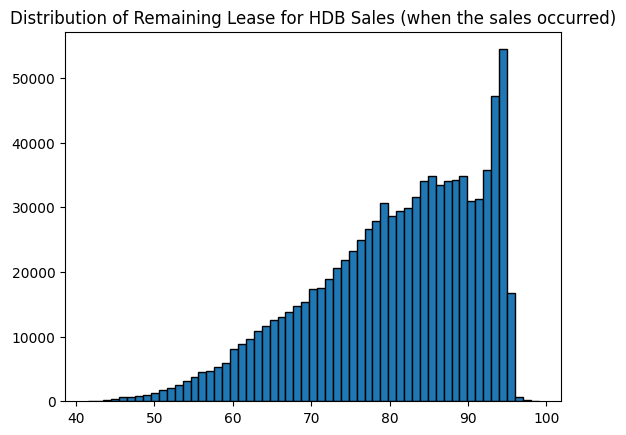

In [146]:
bins = prices['remaining_lease'].max() - prices['remaining_lease'].min()
plt.hist(prices['remaining_lease'], bins=int(bins), edgecolor='black')
plt.title('Distribution of Remaining Lease for HDB Sales (when the sales occurred)')
plt.show()

### Inflation Adjustment By Consumer Price Index (CPI)

In [147]:
# Compute adjusted resale price for inflation using CPI for Housing & Utilities
# https://www.singstat.gov.sg/whats-new/latest-news/cpi-highlights

cpi['Year_Month'] = pd.to_datetime(cpi['Year_Month'], format = '%Y %b') # to datetime
cpi.rename(columns= {'Year_Month': 'transaction_date'}, inplace =True)
prices = prices.merge(cpi, on='transaction_date', how='left')  # merge 'prices' with 'cpi' 

prices['CPI'] = prices['CPI'].fillna(method='ffill') #  missing CPI values for June and July 2024 with May 2024 cpi

prices['real_price'] = (prices['resale_price'] / prices['CPI']) * 100  

print(prices[prices['CPI'].isnull()]) # check if any missing values

Empty DataFrame
Columns: [transaction_date, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, remaining_lease, CPI, real_price]
Index: []


In [148]:
prices.columns

Index(['transaction_date', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'remaining_lease', 'CPI', 'real_price'],
      dtype='object')

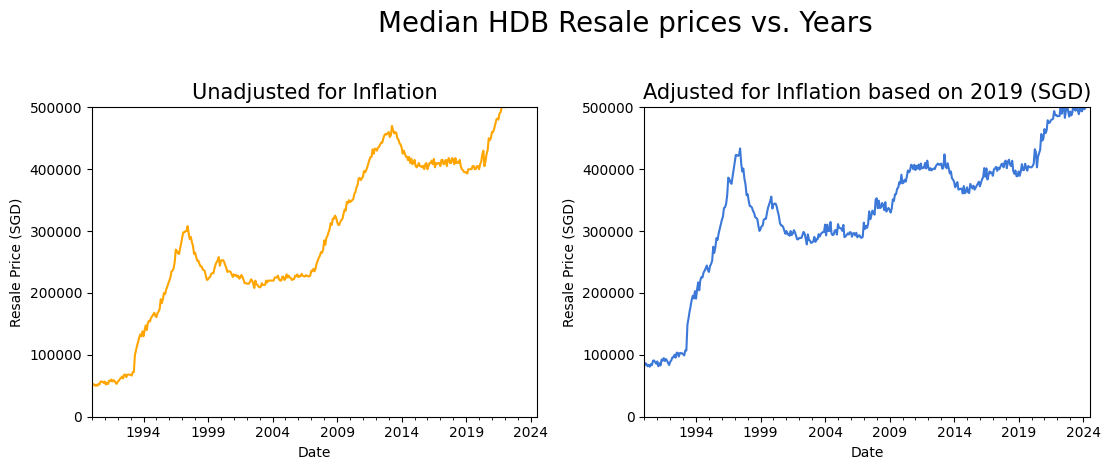

In [149]:
# Plot median resale price vs years

fig = plt.figure(figsize=(14,5)) # Create a figure 
fig.suptitle('Median HDB Resale prices vs. Years', fontsize=20)

# Unadjusted
ax1 = fig.add_subplot(121) # first subplot

# group 'prices' by 'transaction_date' (X)
# aggregate 'resale_price', maintain dataframe by giving double []. (Y)
# compute resale price mean for each 'transaction_date'
prices.groupby('transaction_date')[['resale_price']].median().plot(ax=ax1, color='orange', legend=None)

ax1.set_xlabel('Date')
ax1.set_ylabel('Resale Price (SGD)')
ax1.set_ylim(0, 500000)
ax1.set_title('Unadjusted for Inflation', size=15)


# Adjusted
ax2 = fig.add_subplot(122) # second subplot
prices.groupby('transaction_date')[['real_price']].median().plot(ax=ax2, color='#3c78d8', legend=None)

ax2.set_xlabel('Date')
ax2.set_ylabel('Resale Price (SGD)')
ax2.set_ylim(0, 500000)
ax2.set_title('Adjusted for Inflation based on 2019 (SGD)',size=15)

plt.tight_layout(rect=[0.05, 0.05, 0.85, 0.95]) 

plt.show()

In [150]:
prices.head()

,transaction_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,CPI,real_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,9000.0,86.0,60.894,14779.781259
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977-01-01,6000.0,86.0,60.894,9853.187506
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,8000.0,86.0,60.894,13137.583342
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977-01-01,6000.0,86.0,60.894,9853.187506
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976-01-01,47200.0,85.0,60.894,77511.741715


## 4. Exploratory Data Analysis (EDA)

1. Summary stats for numerical and categorical features
2. Data visualization ( histograms, box plots, scatter plot)
3. Correlation analysis : calc and visualize correlations btw features


### 4.1. By Flat Type

##### Proportion of flat types

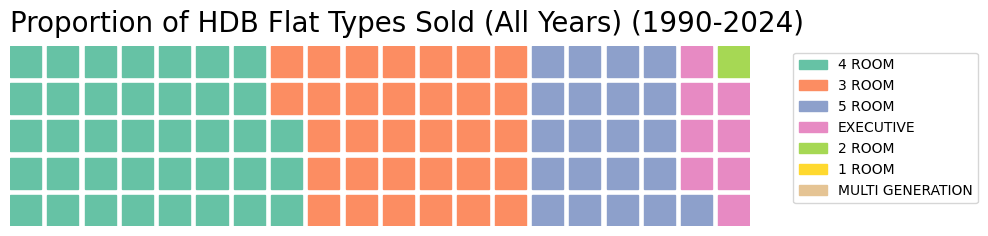

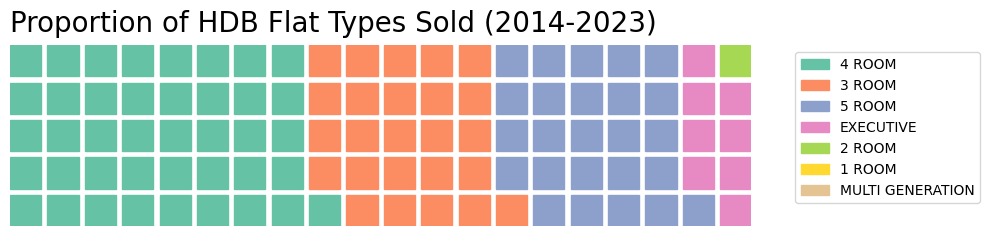

In [151]:
## Waffle plot for flat types
from pywaffle import Waffle

prices['year'] = pd.DatetimeIndex(prices['transaction_date']).year  # add 'year' column
flat_type = prices['flat_type'].value_counts(normalize=True) * 100  # Calculate percentage of each flat type for all years
flat_type1423 = prices['flat_type'].value_counts(normalize=True) * 100 
flat_type1423 = prices[prices['year'].isin(range(2014,2023))]['flat_type'].value_counts(normalize=True) * 100 # Calculate percentage of each flat types from 2014-2022 


# Plot for all years (2014-2023)
fig1 = plt.figure(
    figsize=(10, 5),
    FigureClass=Waffle,
    rows=5,
    columns=20,
    values=flat_type,  # Use the all-year flat type data
    labels=['4 ROOM', '3 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM', '1 ROOM', 'MULTI GENERATION'],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 10},
    title={
        'label': 'Proportion of HDB Flat Types Sold (All Years) (1990-2024)',  # Updated title for all years
        'loc': 'left',
        'fontdict': {
            'fontsize': 20
        },
        'pad': 10
    }
)

# Plot for 2014-2023
plt.show()
fig2 = plt.figure(
    figsize=(10, 5),
    FigureClass=Waffle,
    rows=5,
    columns=20,
    values=flat_type1423,
    labels=['4 ROOM', '3 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM', '1 ROOM', 'MULTI GENERATION'],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 10},
    title={
        'label': 'Proportion of HDB Flat Types Sold (2014-2023)',  # Corrected: Added the closing quote
        'loc': 'left',
        'fontdict': {
            'fontsize': 20
        },
        'pad': 10
    }
)


As there are not many 1-Room and Multi-Generation flats, so they will be ignored for this part.

In [152]:
print(flat_type)

flat_type
4 ROOM              38.016621
3 ROOM              31.906577
5 ROOM              21.084803
EXECUTIVE            7.512126
2 ROOM               1.281036
1 ROOM               0.140305
MULTI GENERATION     0.058532
Name: proportion, dtype: float64


In [153]:
flattype = ['3 ROOM','4 ROOM','5 ROOM','EXECUTIVE']
prices1923 = prices[(prices['transaction_date'] >= '2019-01-01') & (prices['transaction_date'] <= '2023-12-31')]
prices1923 = prices1923[prices1923['flat_type'].isin(flattype)][['transaction_date', 'flat_type', 'real_price']].copy()
prices1923.loc[:, 'flat_type_year'] = prices1923['flat_type'] + ' - ' + prices1923['transaction_date'].dt.year.astype(str)
prices1923

,transaction_date,flat_type,real_price,flat_type_year
788222,2019-01-01,3 ROOM,230851.843302,3 ROOM - 2019
788223,2019-01-01,3 ROOM,235870.361634,3 ROOM - 2019
788224,2019-01-01,3 ROOM,238881.472634,3 ROOM - 2019
788225,2019-01-01,3 ROOM,240888.879967,3 ROOM - 2019
788226,2019-01-01,3 ROOM,240888.879967,3 ROOM - 2019
...,...,...,...,...
915298,2023-12-01,EXECUTIVE,695404.740707,EXECUTIVE - 2023
915299,2023-12-01,EXECUTIVE,738696.966759,EXECUTIVE - 2023
915300,2023-12-01,EXECUTIVE,665532.470051,EXECUTIVE - 2023
915301,2023-12-01,EXECUTIVE,687569.969059,EXECUTIVE - 2023


C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\3232984604.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  fig, axes = joypy.joyplot(prices1923, by='flat_type_year', column = 'real_price', figsize=(9,7), linewidth=0.05, overlap=1.5, alpha=0.8, colormap=plt.cm.get_cmap('Accent',4))
C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\3232984604.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


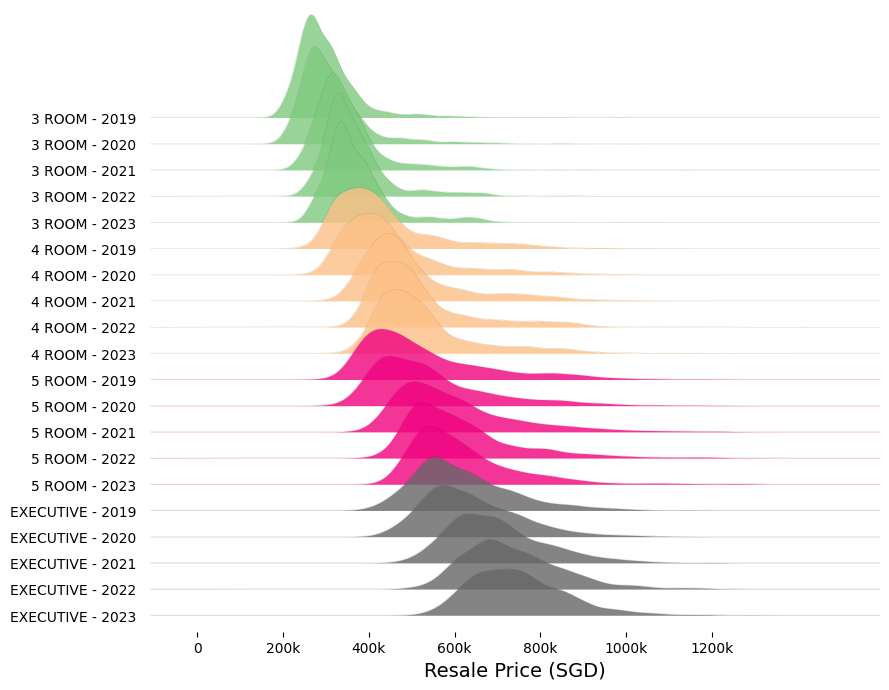

In [154]:
# Ridgeline plot 
# To identify distribution and trends of sales price of each flat types by year
import joypy
fig, axes = joypy.joyplot(prices1923, by='flat_type_year', column = 'real_price', figsize=(9,7), linewidth=0.05, overlap=1.5, alpha=0.8, colormap=plt.cm.get_cmap('Accent',4))
axes[-1].set_xticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000]) 
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k']) 
plt.xlabel('Resale Price (SGD)', fontsize=14)
fig.show()

- All flat types have experienced price increases over the past five years.
- Flats with more rooms show a wider price range, indicating greater variability in their selling prices.
- This variability may stem from the fact that larger flats, like 5-room and executive types, are often limited to specific neighborhoods, leading to limited options.

### 4.2. By Town

In [155]:
prices.dtypes

transaction_date       datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date    datetime64[ns]
resale_price                  float64
remaining_lease               float64
CPI                           float64
real_price                    float64
year                            int32
dtype: object

In [156]:
print(prices['flat_type'].value_counts())

flat_type
4 ROOM              353328
3 ROOM              296541
5 ROOM              195963
EXECUTIVE            69818
2 ROOM               11906
1 ROOM                1304
MULTI GENERATION       544
Name: count, dtype: int64


In [157]:
# Function for color code assignment to min/max value 
def assign_color(real_price, df):
    if real_price == df['real_price'].max():
        return '#36a520'  #  green
    elif real_price == df['real_price'].min():
        return '#be371f'  #  red
    else:
        return '#14a2af'  # light blue


# 1990-2023 (full) (% changes)
# all room types
prices9023 = prices[prices['year'].isin([1990,2023])]
prices9023 = prices9023.groupby(['town','year'], as_index=False).agg({'real_price':'median'})
prices9023['changes'] = prices9023.groupby('town')['real_price'].pct_change() * 100 # calculation done separately for each town using groupby
prices9023 = prices9023[prices9023['changes'].notnull()]
prices9023 = prices9023.sort_values('changes', ascending=True).reset_index(drop=True) 
prices9023['color'] = prices9023['changes'].apply(lambda x: '#36a520' if x > 0 else '#be371f')  # positive growth indicates light green; negative growth indicates light red

# 4-Room 
prices9023_4room = prices[(prices['flat_type'] == '4 ROOM') & (prices['year'].isin([1990, 2023]))]
prices9023_4room = prices9023_4room.groupby(['town','year'], as_index=False).agg({'real_price':'median'})
prices9023_4room['changes'] = prices9023_4room.groupby('town')['real_price'].pct_change() * 100 
prices9023_4room = prices9023_4room[prices9023_4room['changes'].notnull()] 
prices9023_4room = prices9023_4room.sort_values('changes', ascending=True).reset_index(drop=True).reset_index(drop=True)
prices9023_4room['color'] = prices9023_4room['changes'].apply(lambda x: '#36a520' if x > 0 else '#be371f') 

# 2014 vs 2023 datasets (10-years) (median price)
# all room types
prices1423 = prices[prices['year'].isin([2014, 2023])] 
prices1423 = prices1423.groupby(['town'], as_index=False).agg({'real_price': 'median'}).sort_values('real_price', ascending=True).reset_index(drop=True)
prices1423['real_price'] = round(prices1423['real_price'] / 1000)  # round off to 3 digits
prices1423['color'] = prices1423['real_price'].apply(assign_color, df=prices1423) 

# 4-room
prices1423_4room = prices[(prices['flat_type'] == '4 ROOM') & (prices['year'].isin([2014, 2023]))]
prices1423_4room = prices1423_4room.groupby(['town'], as_index=False).agg({'real_price': 'median'}).sort_values('real_price', ascending=True).reset_index(drop=True)
prices1423_4room['real_price'] = round(prices1423_4room['real_price'] / 1000)
prices1423_4room['color'] = prices1423_4room['real_price'].apply(assign_color, df=prices1423_4room)

# 2022 vs 2023 datasets (% changes)
# all room types
prices2223 = prices[prices['year'].isin([2022, 2023])]
prices2223 = prices2223.groupby(['town', 'year'], as_index=False).agg({'real_price': 'median'})
prices2223['changes'] = prices2223.groupby('town')['real_price'].pct_change() * 100  
prices2223 = prices2223[prices2223['changes'].notnull()]
prices2223 = prices2223.sort_values('changes', ascending=True).reset_index(drop=True)  
prices2223['color'] = prices2223['changes'].apply(lambda x: '#36a520' if x > 0 else '#be371f') 

# 4-room
prices2223_4room = prices[(prices['flat_type'] == '4 ROOM') & (prices['year'].isin([2022, 2023]))]
prices2223_4room = prices2223_4room.groupby(['town', 'year'], as_index=False).agg({'real_price': 'median'})
prices2223_4room['changes'] = prices2223_4room.groupby('town')['real_price'].pct_change() * 100 
prices2223_4room = prices2223_4room[prices2223_4room['changes'].notnull()] 
prices2223_4room = prices2223_4room.sort_values('changes', ascending=True).reset_index(drop=True)  
prices2223_4room['color'] = prices2223_4room['changes'].apply(lambda x: '#36a520' if x > 0 else '#be371f')  # positive growth, light green; negative growth, light red

In [158]:
# Function of lollipop charts

def loll_chart(df, x, y, subtitle, xlabel, xlim):
    plt.rc('axes',axisbelow=True)
    plt.grid(linestyle='--', alpha=0.4)

    # Draw the lollipop chart
    plt.hlines(y=df.index, xmin=0, xmax=df[x], color=df.color, linewidth=1)
    plt.scatter(df[x], df.index, color=df.color, s=300)

    # Annotate each point 
    for i, txt in enumerate(df[x]):
        plt.annotate(str(round(txt)), (txt, i), color='white', fontsize=9, ha='center', va='center')
    # Add subtitle
    plt.annotate(subtitle, xy=(1, 0), xycoords='axes fraction', fontsize=18, xytext=(-5, 5), textcoords='offset points', ha='right', va='bottom')
    # Customize the axes
    plt.yticks(df.index, df[y])
    plt.xticks(fontsize=12)
    plt.xlim(xlim)
    plt.xlabel(xlabel, fontsize=14) 

C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\2092381449.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()])
C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\2092381449.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()])


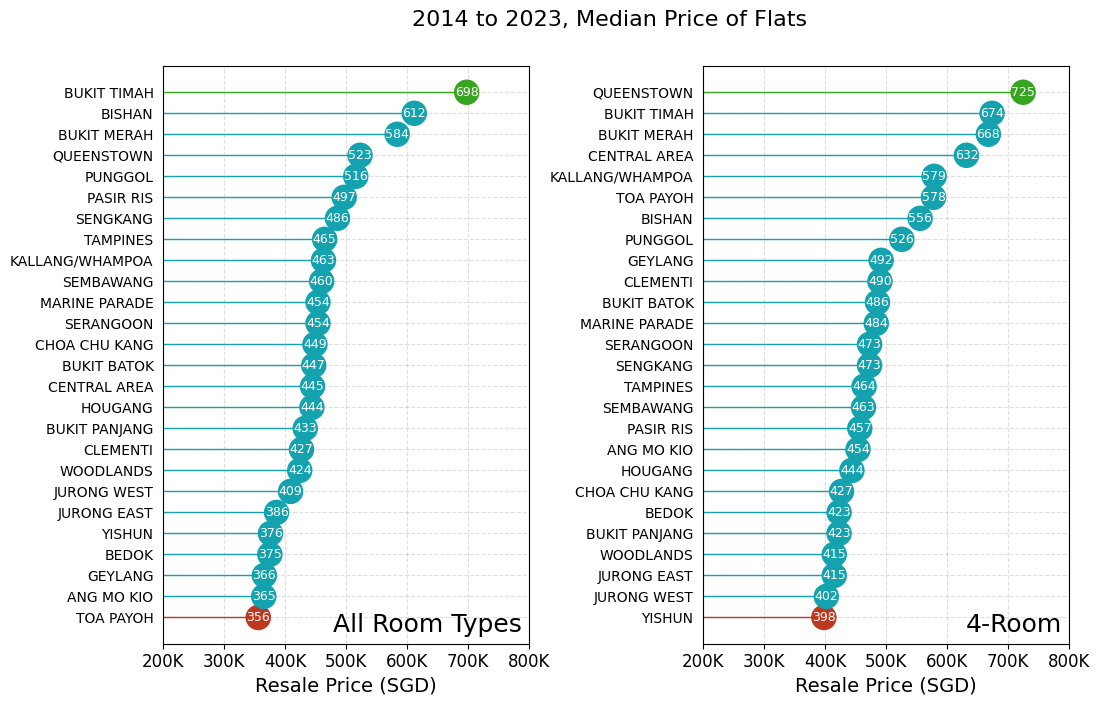

In [159]:
# Median Price Change lollipop chart (2014 vs. 2023)
fig = plt.figure(figsize=(12,7))

# All room types
ax1 = plt.subplot(121)
loll_chart(prices1423,'real_price','town','All Room Types','Resale Price (SGD)',[200,800])
ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()])
ax1.yaxis.set_ticks_position('none') 

# 4-Room
ax2 = plt.subplot(122)
loll_chart(prices1423_4room, 'real_price', 'town', '4-Room', 'Resale Price (SGD)', [200,800])
ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()])
ax2.yaxis.set_ticks_position('none') 

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.suptitle('2014 to 2023, Median Price of Flats', fontsize=16)
plt.show()

- **Overall Price Distribution:** **Bukit Timah**, **Bishan**, and **Bukit Merah** consistently rank at the higher end of the resale price spectrum for all room types and 4-room flats, marking them as **top-tier locations**.

- **Toa Payoh** shows a notable contrast, with a lower median resale price for all room types (SGD 356k) but a higher ranking for 4-room flats (SGD 578k).

- The charts indicate that **central** and **more developed areas** have higher resale prices, while outlying areas offer more affordable options.

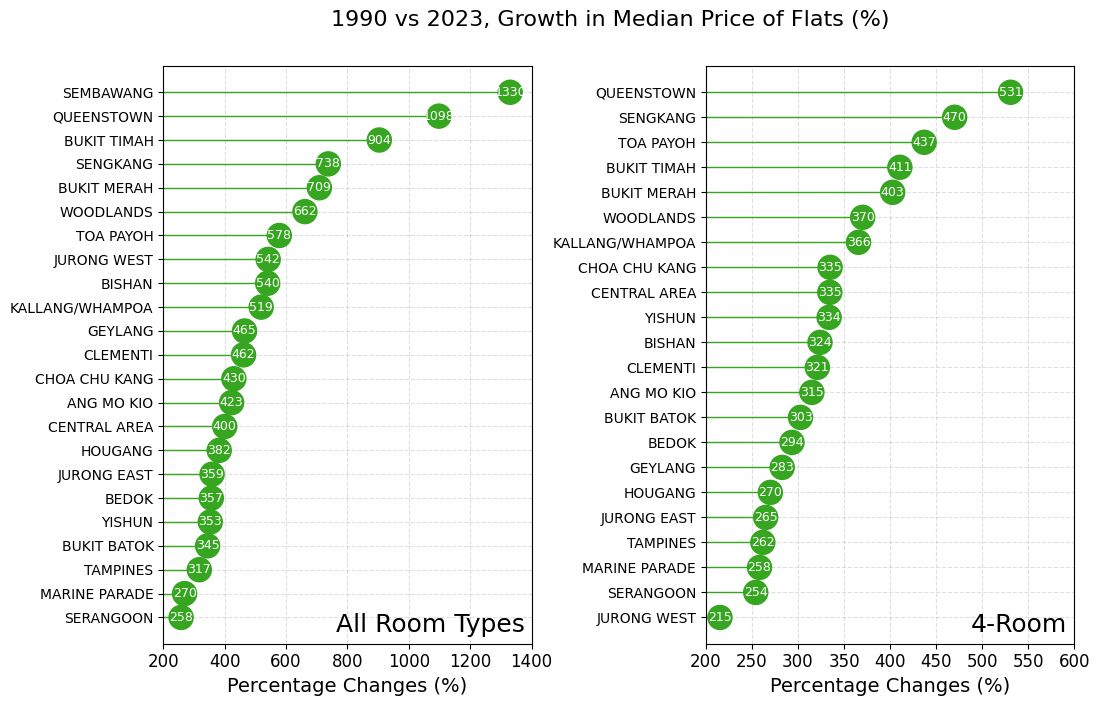

In [160]:
# Percentage Median Price Change lollipop charts (1990 vs. 2023)
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(121)
loll_chart(prices9023, 'changes', 'town', 'All Room Types', 'Percentage Changes (%)', [200,1400])

ax2 = plt.subplot(122)
loll_chart(prices9023_4room, 'changes', 'town', '4-Room', 'Percentage Changes (%)', [200,600])

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.suptitle('1990 vs 2023, Growth in Median Price of Flats (%)', fontsize=16)
plt.show()

In recent 3 decades, Singaporean HDB flats experiences substantial increases in value.
- **Significant Growth**: **Sembawang** and **Queenstown** show the highest percentage increases in median resale prices for all room types, with growth rates exceeding 900%. For 4-room flats, **Queenstown** leads with a 531% increase, followed by **Sengkang** at 470%.

- **Queenstown**, **Toa Payoh**, and **Bukit Timah** consistently appear among the top towns for price growth in both all room types and 4-room flats, indicating these areas have experienced sustained demand over the decades.

- **Varied Growth**: While central and well-developed areas like **Bukit Timah** and **Bukit Merah** show strong growth, outer areas like **Sembawang** also exhibit significant price appreciation, suggesting a broader trend of rising property values across Singapore.

- **Lagging Areas**: Towns like **Serangoon** and **Jurong West** have seen comparatively lower growth, which may indicate different factors influencing resale prices, such as local amenities, development projects, or connectivity.

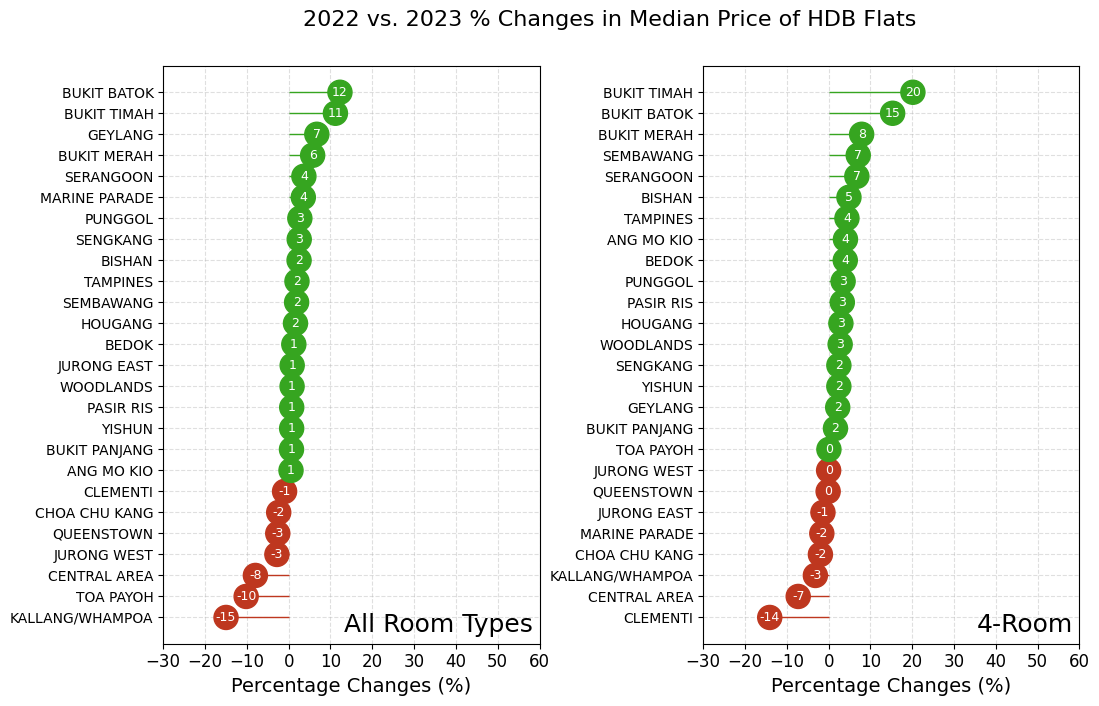

In [161]:
# Percentage Median Price Change lollipop charts（2022 vs. 2023)
fig = plt.figure(figsize=(12,7))

# All room types
ax1 = plt.subplot(121)
loll_chart(prices2223, 'changes', 'town', 'All Room Types', 'Percentage Changes (%)', [-30,60])

# 4-Room
ax2 = plt.subplot(122)
loll_chart(prices2223_4room, 'changes', 'town', '4-Room', 'Percentage Changes (%)', [-30,60])

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.suptitle('2022 vs. 2023 % Changes in Median Price of HDB Flats', fontsize=16)
plt.show()


- **Strong Growth**: **Bukit Batok** and **Bukit Timah** show the highest growth rates, with **Bukit Batok** increasing by 12% for all room types and 20% for 4-room flats. This suggests strong recent demand or new developments in these areas.

- **Emerging Trends**: Areas like **Bukit Merah** and **Sembawang** also show positive price changes, indicating steady growth and possibly increasing desirability in these locations.

- **Price Corrections**: **Kallang/Whampoa** and **Clementi** have seen significant price declines. This could indicate a market correction.

- **Mixed Performance**: **Yishun** and **Pasir Ris** show declines in all room types but stable or slight increases for 4-room flats, suggesting a **shift in demand toward larger units** in these towns.

### 4.3. By Block Number

- HDB flats use 3 digit system as their block number, with the 1st digit representing a neighborhood in a town. 
- For e.g., Ang Mo Kio neighborhood 1 starts with 101, Ang Mo Kio neighborhood 2 starts with 201.
- Therefore, the 3 digit is separated into first digit and last 2 digits separately in the next plot.

In [162]:
prices.head()

,transaction_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,CPI,real_price,year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,9000.0,86.0,60.894,14779.781259,1990
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977-01-01,6000.0,86.0,60.894,9853.187506,1990
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977-01-01,8000.0,86.0,60.894,13137.583342,1990
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977-01-01,6000.0,86.0,60.894,9853.187506,1990
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976-01-01,47200.0,85.0,60.894,77511.741715,1990


C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\2614121626.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\2614121626.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)


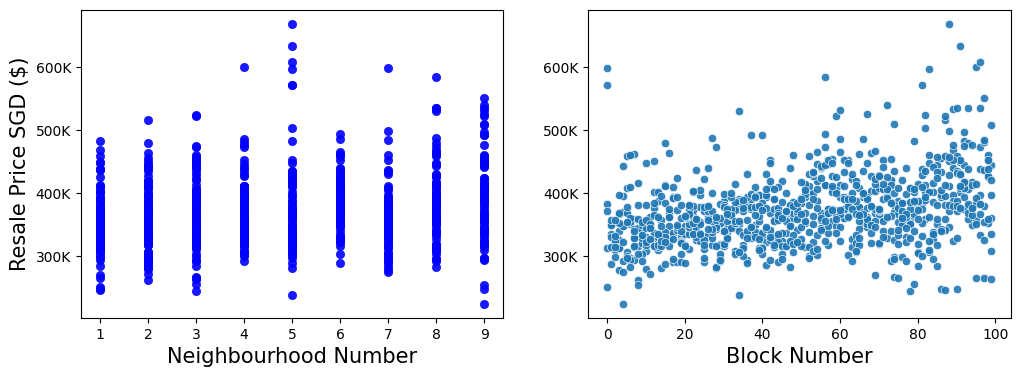

In [163]:
import re

# Get block number prices
get_block_num = lambda x: int(re.findall("\d+", x)[0]) # get the block number in lists, extract the element
prices['block_num'] = prices['block'].apply(get_block_num)
tmp = prices[prices['block_num'] > 99] # get only blocks that use 3-digit numbering system
tmp = tmp.groupby('block_num')['real_price'].median().reset_index() # get prices groupby block numbers

# Scatterplots
fig = plt.figure(figsize=(12,4))

ax1 = plt.subplot(121)
sns.scatterplot(x=tmp['block_num'].apply(lambda x: int(str(x)[0])), y=tmp['real_price'], 
                color='blue',ax=ax1, edgecolors='b', alpha=0.9)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Neighbourhood Number', size=15)

ax2 = plt.subplot(122)
b=sns.scatterplot(x=tmp['block_num'].apply(lambda x: int(str(x)[1:])), y=tmp['real_price'], 
                  edgecolors='w', alpha=0.9)
ax2.set_yticklabels(ylabels)
ax2.set_ylabel('', size=15)
ax2.set_xlabel('Block Number', size=15)

plt.show()

- **Lack of Significant Neighborhood Influence**: The scatterplot shows that there is no clear or significant trend in resale prices across different neighborhoods.

- **Block Number Trend**: The  scatterplot suggests a slight upward trend in resale prices with higher block numbers. This might indicate that newer or more recently developed blocks tend to have higher resale prices.

- **No significant relevance to sale price**:The plots indicated the neighborhood and block number alone do not provide a strong predictive trend.

### 4.3. By Storey

C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\1548039262.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\1548039262.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(storey_all_years['storey_range'], rotation=45, ha='right')
C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\1548039262.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)
C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\1548039262.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(storey_2014_2023['storey_range'], rotation=45, ha='right')


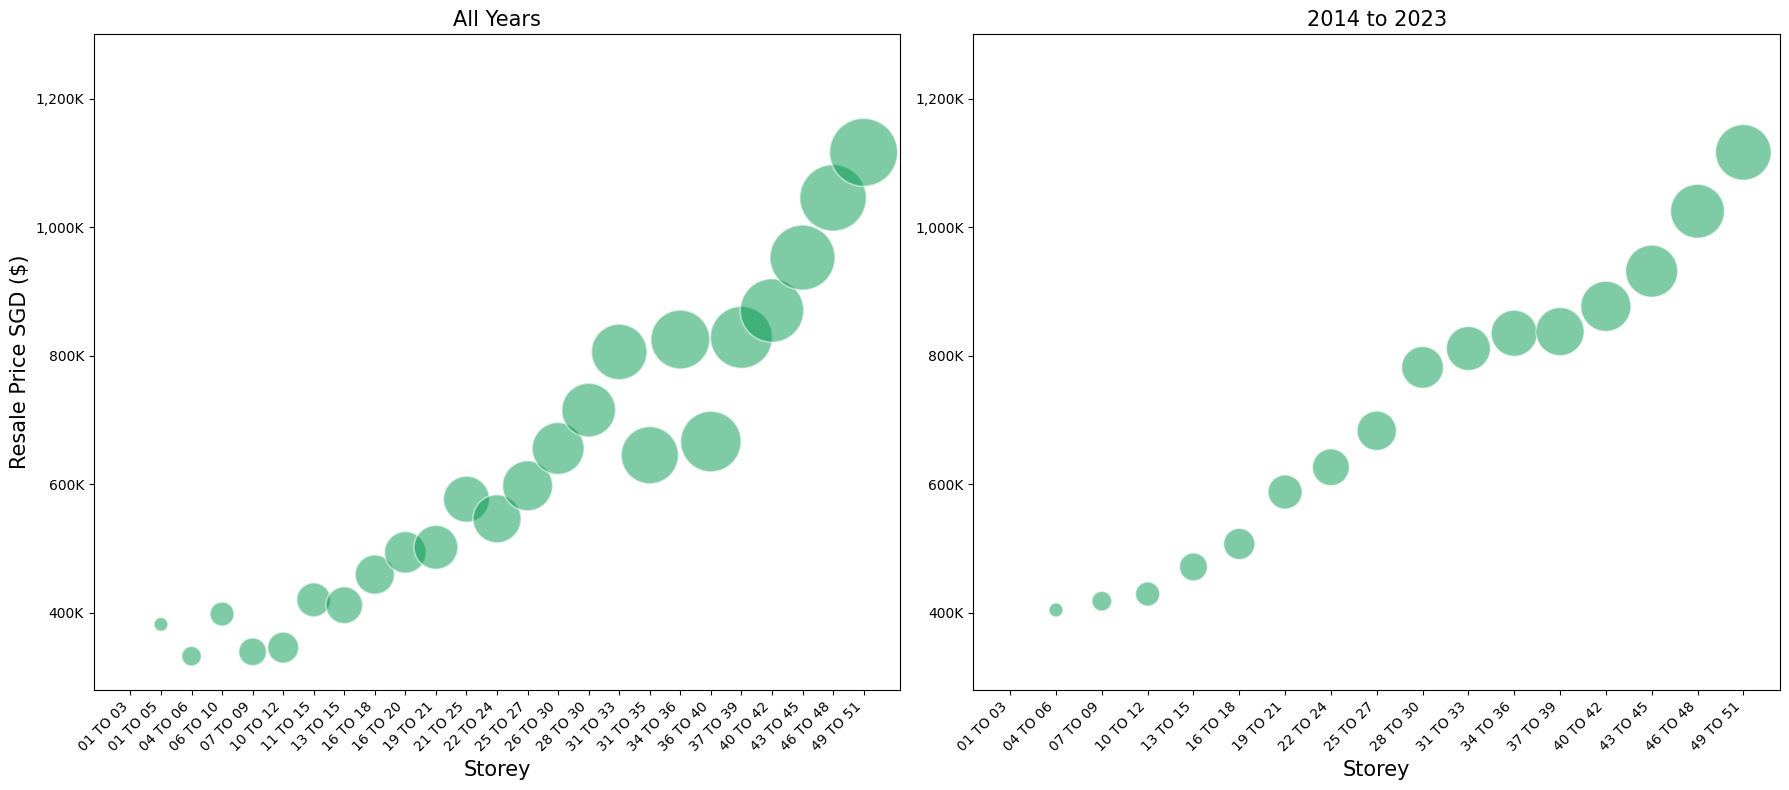

In [164]:
# All years
storey_all_years = prices.groupby('storey_range')['real_price'].median().reset_index().sort_values(by='storey_range')
storey_all_years['storey_rank'] = storey_all_years['storey_range'].astype('category').cat.codes

# 2014-2023
filtered_prices = prices[prices['transaction_date'].dt.year.isin(range(2014, 2024))]
storey_2014_2023 = filtered_prices.groupby('storey_range')['real_price'].median().reset_index().sort_values(by='storey_range')
storey_2014_2023['storey_rank'] = storey_2014_2023['storey_range'].astype('category').cat.codes

# Bubble plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot for All Years
sns.scatterplot(x=storey_all_years['storey_range'], y=storey_all_years['real_price'], 
                s=storey_all_years['storey_rank'].astype('int')*100, color='#00994d', 
                edgecolors='w', alpha=0.5, ax=ax1)  

ax1.set_ylim([280000, 1300000])
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel('Resale Price SGD ($)', size=15)
ax1.set_xlabel('Storey', size=15)
ax1.set_title('All Years', size=15)
ax1.set_xticklabels(storey_all_years['storey_range'], rotation=45, ha='right')

# Plot for 2014 to 2023
sns.scatterplot(x=storey_2014_2023['storey_range'], y=storey_2014_2023['real_price'], 
                s=storey_2014_2023['storey_rank'].astype('int')*100, color='#00994d', 
                edgecolors='w', alpha=0.5, ax=ax2)  

ax2.set_ylim([280000, 1300000])
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000]
ax2.set_yticklabels(ylabels)
ax2.set_ylabel('')
ax2.set_xlabel('Storey', size=15)
ax2.set_title('2014 to 2023', size=15)
ax2.set_xticklabels(storey_2014_2023['storey_range'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

A linear relationship is observed. **Higher storeys** fetched **higher sale prices**.

### 4.5. By Flat Type

C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\3761650404.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flat_model',
C:\Users\Lun\AppData\Local\Temp\ipykernel_13536\3761650404.py:10: UserWarning: 
The palette list has fewer values (10) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='flat_model',


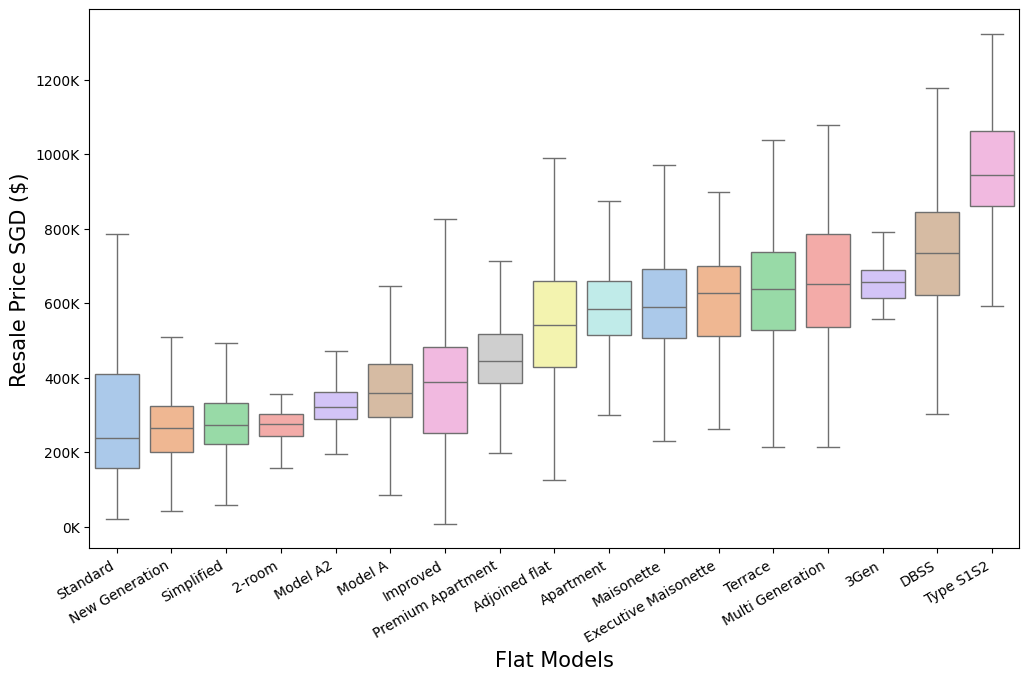

In [165]:
# Boxplot for price distribution of each flat types
from matplotlib.ticker import FuncFormatter

# Formatter function
def thousands(x, pos):
    return f'{int(x/1000)}K'

# Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='flat_model', 
            y='real_price', 
            data=prices, 
            palette=sns.color_palette("pastel"), 
            showfliers=False, 
            order=prices.groupby('flat_model')['real_price'].median().sort_values().index.tolist())

# Apply the formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))

plt.xticks(rotation=30, ha='right')
plt.ylabel('Resale Price SGD ($)', size=15)
plt.xlabel('Flat Models', size=15)
plt.show()

- More premium models like **DBSS** and **Type S1/S2** commanding higher prices, often exceeding SGD 1 million. The **Type S1/S2** is offered by **Pinnacle@Duxton**, which is adjacent to the **business district**, also offering features like **extended bays, balconies and planter areas**, which justified the remarkably high sale price. 

- **Wide Price Range in Premium Models**: Models such as **Executive Maisonette** and **Terrace** also show a broad range of prices, indicating a wide variability in these larger, more exclusive flats.

- **Lower Price Models**: Flats like **Standard**, **New Generation**, and **Simplified** are positioned at the lower end of the price spectrum, typically ranging from SGD 200K to 400K, making them more affordable options.

### 4.6. By Remaining Lease

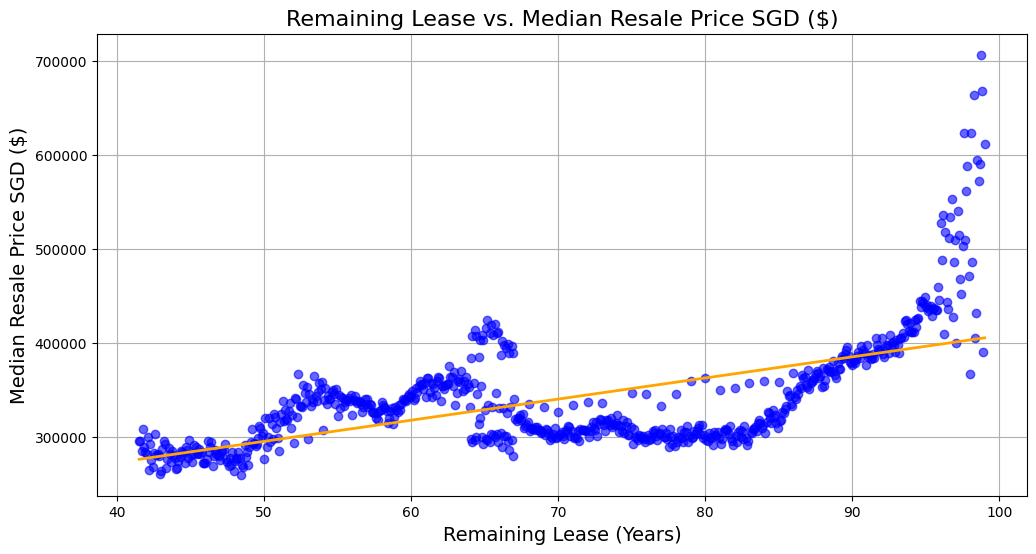

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

median_prices = prices.groupby('remaining_lease')['real_price'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.regplot(x='remaining_lease', y='real_price', data=median_prices, color='blue', scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange', 'linewidth': 2}, ci=None)
plt.title('Remaining Lease vs. Median Resale Price SGD ($)', fontsize=16)
plt.xlabel('Remaining Lease (Years)', fontsize=14)
plt.ylabel('Median Resale Price SGD ($)', fontsize=14)
plt.grid(True)
plt.show()


An obvious upward trendline is observed when the remaining lease increases, which is not surprising.
However, the flats with remaining years more than 95 years tends to have higher resale price, than the trendline.

### Correlation Analysis

                 floor_area_sqm  resale_price  remaining_lease       CPI  \
floor_area_sqm         1.000000      0.560426         0.330034  0.053699   
resale_price           0.560426      1.000000        -0.043241  0.684103   
remaining_lease        0.330034     -0.043241         1.000000 -0.421789   
CPI                    0.053699      0.684103        -0.421789  1.000000   
real_price             0.704073      0.932891         0.120647  0.412847   
block_num              0.250508      0.074344         0.283396  0.058857   

                 real_price  block_num  
floor_area_sqm     0.704073   0.250508  
resale_price       0.932891   0.074344  
remaining_lease    0.120647   0.283396  
CPI                0.412847   0.058857  
real_price         1.000000   0.086542  
block_num          0.086542   1.000000  


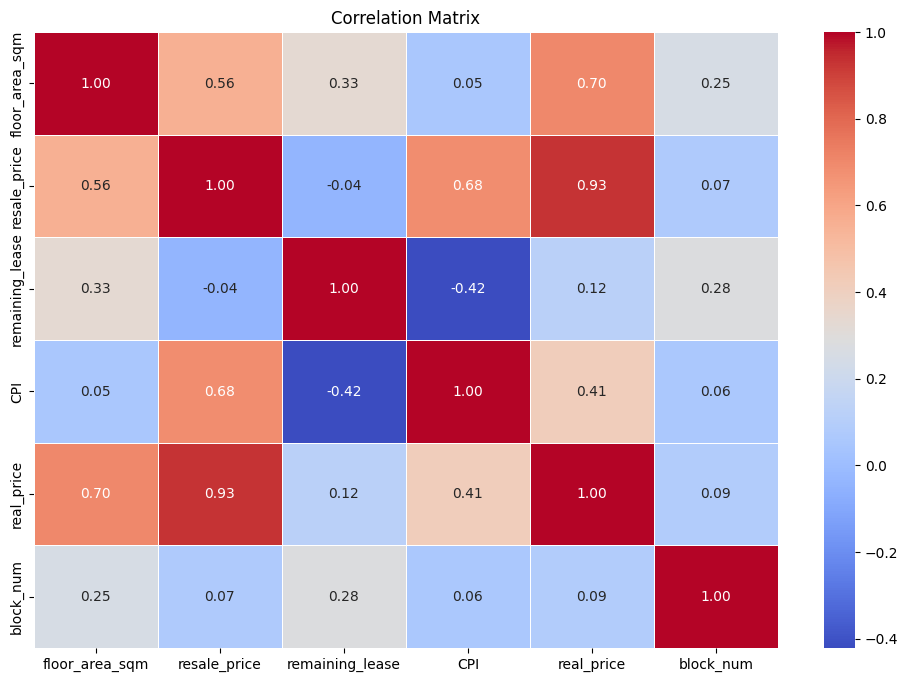

In [167]:
# Select only numeric columns
numeric_columns = prices.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Summary


## References

**Flat models**

https://blog.carousell.com/property/hdb-flat-types-singapore/
https://www.teoalida.com/singapore/hdbfloorplans/
https://sg.finance.yahoo.com/news/different-types-hdb-houses-call-020000642.html?guccounter=1
https://www.propertyguru.com.sg/property-guides/dbss-singapore-17893
https://getforme.com/previous2004/previous290504_hdblaunchesthepinnancleatduxton.htm